# Calcul de la mensualité:

$m$ = mensualité

$N$ = Durée du prêt (en années)

$\alpha$ = Taux d'intéret annuel

$C$ = montant du prêt


Au mois $n$, le restant à payer $C_n$ vaut: $C_n = C_{n-1} + \frac{\alpha}{12}C_{n-1}-m = \left(1+\frac{\alpha}{12}\right)C_{n-1}-m$

On reconnaît une suite arithmético-géométrique de terme général: $C_n = \left(1+\frac{\alpha}{12}\right)^n\left(C-\frac{12m}{\alpha}\right)+\frac{12m}\alpha$

Donc à l'année $N$, le restant à payer (qui doit être nul) vaut: $\left(1+\frac{\alpha}{12}\right)^{12N}\left(C-\frac{12m}{\alpha}\right)+\frac{12m}\alpha$. On obtient:

\begin{align}
m = \frac{\frac{\alpha C}{12}}{1-\left(1+\frac{\alpha}{12}\right)^{-12N}}
\end{align}

In [277]:
def mensualité(alpha, C, N):
    return alpha*C/12/(1-(1+alpha/12)**(-12*N))

def c(n, alpha, C, N):
    m = mensualité(alpha, C, N)
    if n <= 12*N:
        return (1+alpha/12)**n*(C-12*m/alpha)+12*m/alpha
    else:
        return 0

# Calcul du rendement au mois $n$ < $12N$

$\mu$ = croissance annuelle du bien immobilier

$l$ = loyer

$f_n$ = frais de notaire

$f_g$ = frais de gestion locative (en % du loyer)

$A$ = Apport

Au bout du mois $n$, le propriétaire possède:
- Le bien immobilier d'une valeur $(1+\mu)^{\frac{n}{12}}C$
- Le cumul des loyers s'élevant à hauteur de $nl$

Il a dépensé $nm$ en mensualité, $nf_gl$ en frais de gestion locative, $f+A$ en apport total, et est endetté à hauteur de $C_n$

Son rendement au mois $n$ s'élève donc à:

\begin{align}
\eta = \frac{n(l-m-f_gl)+\left(1+\mu\right)^\frac{n}{12}C-C_n-(f_n+A)}{f_n+A}
\end{align}

$\textcolor{red}{Quid des impôts sur le revenu}$

In [278]:
def rendement(n, l, alpha, C, N, mu, fn, A, fg):
    m = mensualité(alpha, C, N)
    Cn = c(n, alpha, C, N)
    if n <= 12*N: # On généralise la formule après avori remboursé la totalité du prêt
        return((n*(l-m-fg*l)+C*(1+mu)**(n/12)-Cn-(fn+A))/(fn+A))
    else:
        return((n*(l-fg*l)-12*N*m+C*(1+mu)**(n/12)-Cn-(fn+A))/(fn+A))

# Simulation

In [279]:
import numpy as np
import matplotlib.pyplot as plt

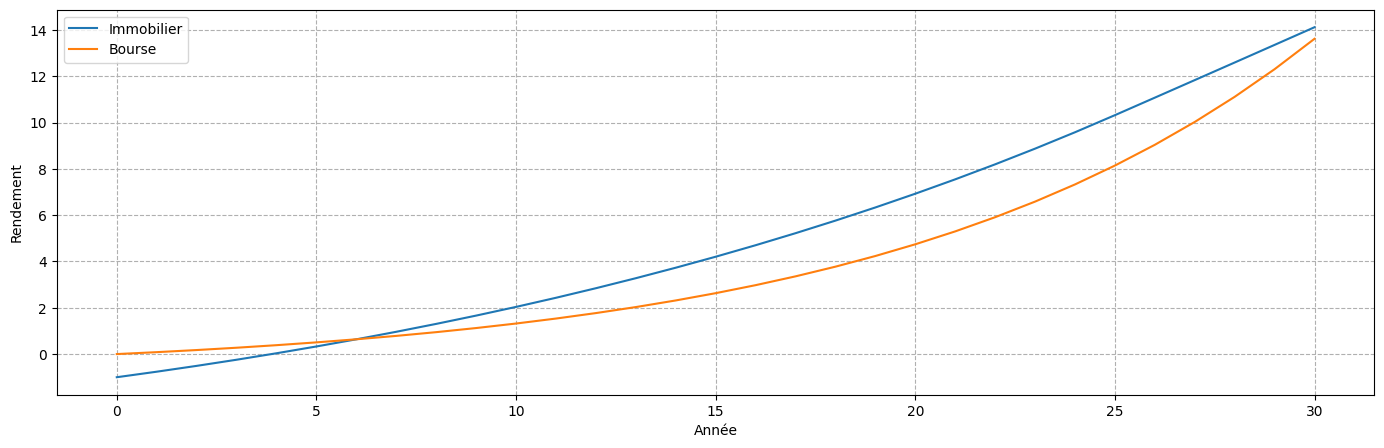

In [296]:
alpha = 4/100 # Taux du prêt
N = 25 # Durée totale du prêt
mu = 1/100 # Croissance de la valeur du bien immobilier
C = 110000 # Montant du bien/montant emprunté
l = 500 # Loyer
fn = 9000 # Frais de notaire
A = 0 # 10/100*C # Apport
fg = 10/100 # Coûts de gestion locative (en % du loyer)

beta = 10/100 # Performance de la bourse
p = 17.2/100 # Prélèvements sociaux

m = mensualité(alpha, C, N)

List_n = range(0, 31)
List_rendement_immo = []
List_rendement_bourse = []

for n in List_n:
    List_rendement_immo.append(rendement(12*n, l, alpha, C, N, mu, fn, A, fg))
    List_rendement_bourse.append(((1+beta)**n-1)*(1-p))

plt.figure(figsize=(17, 5))
plt.plot(List_n, List_rendement_immo, label='Immobilier')
plt.plot(List_n, List_rendement_bourse, label='Bourse')
plt.xlabel('Année')
plt.ylabel('Rendement')
plt.grid(linestyle='--')
plt.legend()